In [18]:
import numpy as np
import tensorflow_datasets as tfds

In [19]:
# Pobieranie zbioru danych KMNIST
dataset, info = tfds.load('kmnist', split=['train', 'test'], shuffle_files=True, with_info=True)

# Podział na zbiór treningowy i testowy
train_dataset, test_dataset = dataset

In [20]:
# Przekształcenie zbiorów danych w odpowiednie formaty
train_df = tfds.as_dataframe(train_dataset, info)
test_df = tfds.as_dataframe(test_dataset, info)

train_images = [row['image'] for _, row in train_df.iterrows()]
train_labels = [row['label'] for _, row in train_df.iterrows()]

test_images = [row['image'] for _, row in test_df.iterrows()]
test_labels = [row['label'] for _, row in test_df.iterrows()]

In [21]:
# Normalizacja danych obrazu, aby były między 0 a 1
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

# Dodanie dodatkowego wymiaru (kanału koloru) do danych obrazu
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [22]:
# Definiowanie liczby klas i konwersja etykiet na kodowanie one-hot
num_classes = 10
train_labels = np.eye(num_classes)[train_labels]
test_labels = np.eye(num_classes)[test_labels]

In [23]:
# Wyświetlenie kształtu danych obrazu i etykiet
print(f'train_images shape: {train_images.shape}')
print(f'test_images shape: {test_images.shape}')
print(f'train_labels shape: {train_labels.shape}')
print(f'test_labels shape: {test_labels.shape}')

train_images shape: (60000, 28, 28, 1, 1)
test_images shape: (10000, 28, 28, 1, 1)
train_labels shape: (60000, 10)
test_labels shape: (10000, 10)


In [24]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Parametry modelu
input_shape = (28, 28, 1)  # Dla obrazów Kazushji-MNIST (KMNIST)
num_classes = 10  # Liczba kategorii w Kazushji-MNIST (różnych znaków)

# Budowanie modelu
model = build_model(input_shape, num_classes)

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Podsumowanie i wyświetlenie tabeli z informacjami o modelu
model.summary()

C:\Moje pliki\Projekty\covolutional-neural-network\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint_callback = ModelCheckpoint('model.keras', save_best_only=True)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

hist = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, 
                 callbacks=[checkpoint_callback, reduce_lr_callback])

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7492 - loss: 0.7787 - val_accuracy: 0.9447 - val_loss: 0.1801 - learning_rate: 0.0010
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9588 - loss: 0.1346 - val_accuracy: 0.9669 - val_loss: 0.1120 - learning_rate: 0.0010
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9738 - loss: 0.0848 - val_accuracy: 0.9647 - val_loss: 0.1147 - learning_rate: 0.0010
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9826 - loss: 0.0558 - val_accuracy: 0.9770 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9862 - loss: 0.0433 - val_accuracy: 0.9775 - val_loss: 0.0781 - learning_rate: 0.0010
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9902 - loss: 0.0301 - val_accuracy: 0.9780 - val_loss: 0.0792 - learning_rate: 0.0010
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9933 - loss: 0

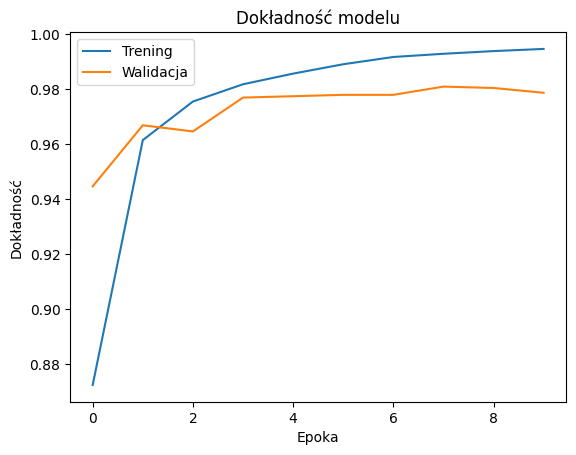

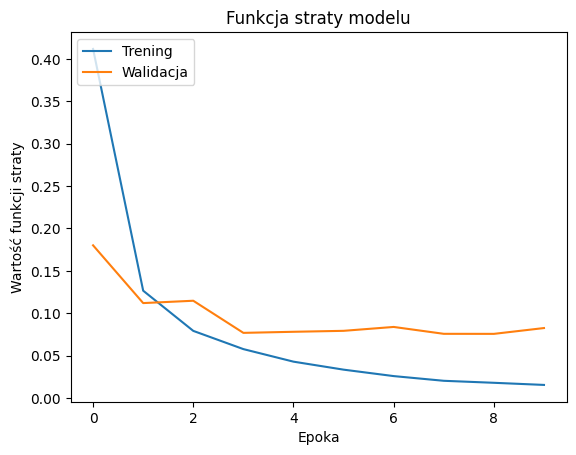

In [26]:
import matplotlib.pyplot as plt

# Wykres dokładności modelu
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

# Wykres funkcji straty modelu
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Funkcja straty modelu')
plt.ylabel('Wartość funkcji straty')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

In [27]:
# Przewidywanie etykiet dla zbioru testowego
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(predictions.shape)
print(predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(10000, 10)
[5 9 6 ... 8 5 7]


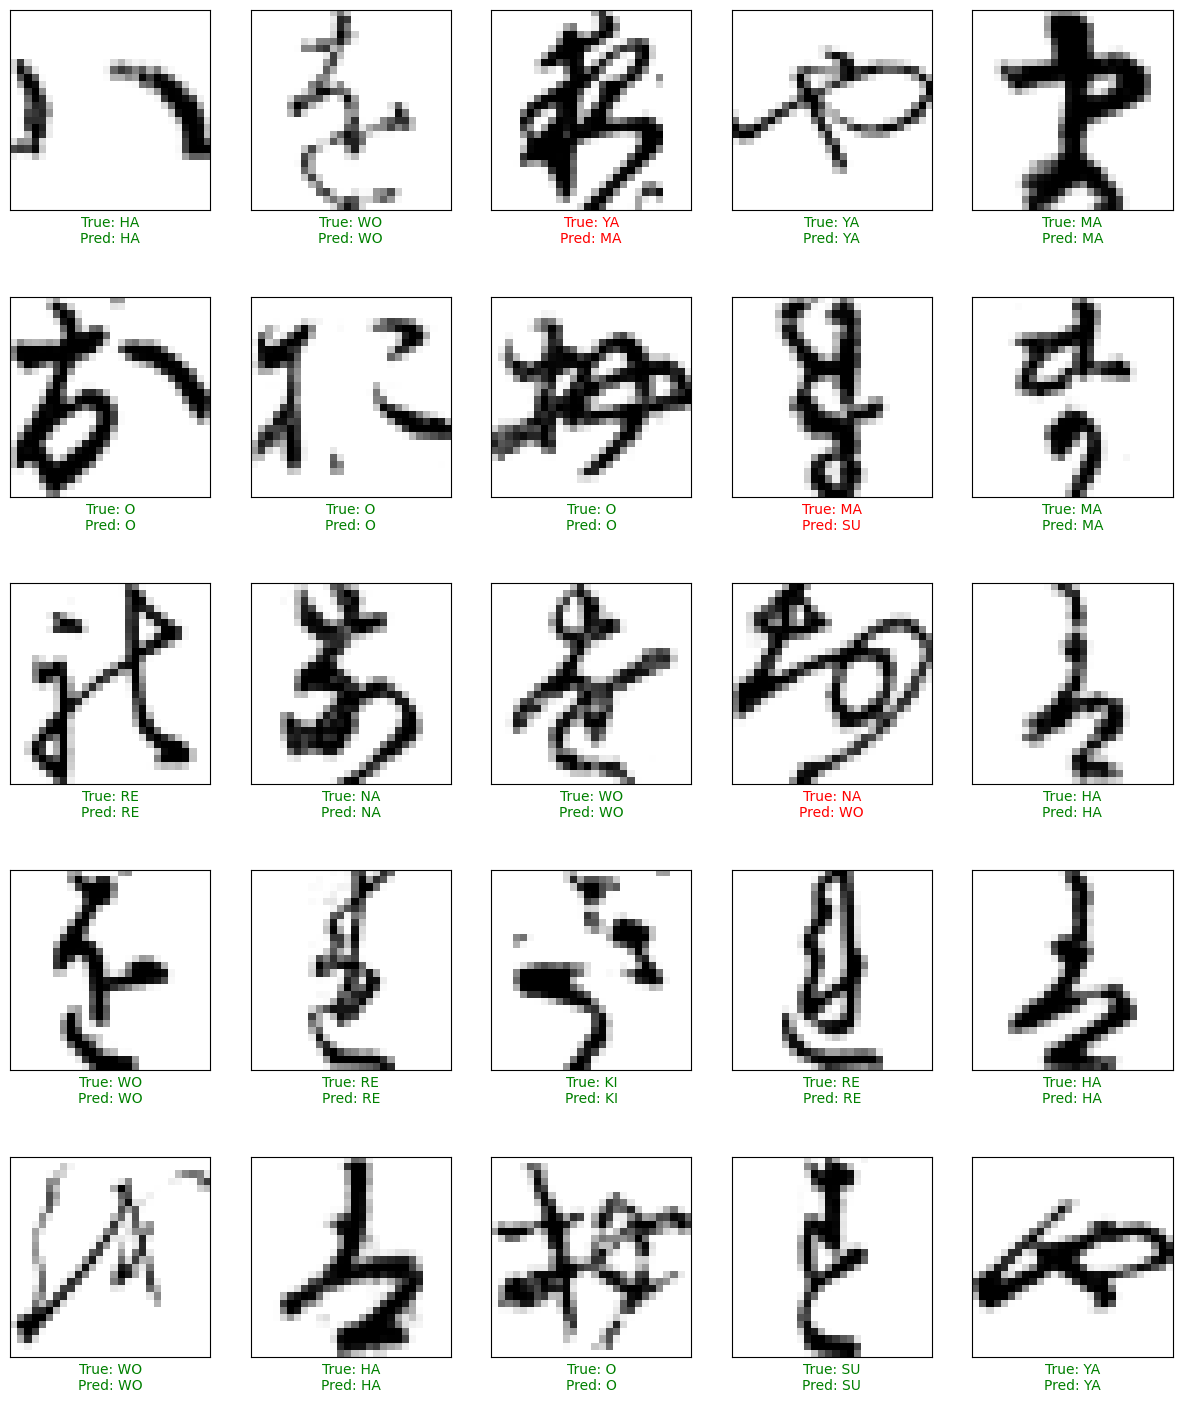

In [28]:
def plot_images(images, true_labels, predicted_labels, class_names, num_images=25):
    true_label_indices = np.argmax(true_labels, axis=1)  # Convert from one-hot to class indices
    plt.figure(figsize=(15, 18))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = np.squeeze(images[i])  # Squeeze unnecessary dimensions
        plt.imshow(img, cmap=plt.cm.binary)
        color = 'green' if predicted_labels[i] == true_label_indices[i] else 'red'
        plt.xlabel(f"True: {class_names[true_label_indices[i]]}\nPred: {class_names[predicted_labels[i]]}", color=color)
    plt.show()

# Nazwy klas (etykiety)
class_names = ['O', 'KI', 'SU', 'TSU', 'NA',
               'HA', 'MA', 'YA', 'RE', 'WO']

# Wywołanie funkcji plot_images
plot_images(test_images[:25], test_labels[:25], predicted_labels[:25], class_names)